# 1. Data Exploration

In [375]:
import warnings 
warnings.filterwarnings ("ignore")

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample

In [377]:
## read data 
import pandas as pd
data = pd.read_csv("data/data.csv")
data.head(5)

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


In [378]:
data.dtypes

ticker     object
date       object
last      float64
volume      int64
dtype: object

In [379]:
## number of ticker
len(data.ticker.unique())

248

In [380]:
## dates range
data["date"] = pd.to_datetime(data["date"])
data.date.unique()

array(['2013-01-04T00:00:00.000000000', '2013-01-07T00:00:00.000000000',
       '2013-01-08T00:00:00.000000000', ...,
       '2021-03-17T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-03-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [381]:
### separate the train & test set
train_start = pd.to_datetime("2013-01-04")
train_end =  pd.to_datetime("2017-12-31")
test_start = pd.to_datetime("2018-01-01")
test_end =  pd.to_datetime("2021-03-19")

data_train = data[(data["date"] >= train_start) & (data["date"] <= train_end)]

In [382]:
## prepare the data sets
price = data_train.pivot(index = "date", columns = "ticker", values = "last")
volume = data_train.pivot(index = "date", columns = "ticker", values = "volume")
price

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,169.0987,NaN,147.8887,970.6780,950.5521,1232.0186,413.2189,278.1162,NaN,478.8201,...,847.8471,1727.7597,1332.1473,1367.1194,487.5256,567.3170,3719.2396,1721.7623,20584.8363,1482.3931
2013-01-07,166.3266,NaN,144.9890,960.1615,924.2187,1236.1949,411.5426,278.1162,NaN,480.4769,...,804.2336,1744.7820,1327.9713,1364.4123,475.2036,594.1617,3732.0499,1695.8510,21150.4557,1453.9312
2013-01-08,166.3266,NaN,144.9890,955.9548,938.6596,1215.3132,407.3517,277.2709,NaN,473.8496,...,795.5109,1761.8042,1340.4993,1377.0457,470.5604,585.2135,3736.3199,1627.9455,21243.1802,1472.9058
2013-01-09,165.4026,NaN,144.9890,944.3866,945.4553,1240.3712,417.4098,278.9616,NaN,482.1337,...,780.6823,1766.0598,1336.3233,1440.2130,479.3109,631.7442,3757.6703,1612.7561,21159.7281,1442.0720
2013-01-10,167.2507,NaN,144.9890,942.2833,943.7564,1252.9002,435.0114,284.8789,NaN,490.4178,...,810.3395,1757.5487,1340.4993,1516.0136,481.9896,619.2167,3791.8310,1568.9749,20918.6445,1442.0720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,587.8069,3275.8098,NaN,1270.2837,3089.3377,5067.0575,1244.1455,1062.2183,1507.5343,1925.7959,...,1231.5360,2443.7824,2052.4368,3745.0113,1289.4510,1066.2972,8119.3994,6017.0484,43409.6785,4385.4768
2017-12-26,585.8891,3280.6201,NaN,1260.7259,3098.6852,5121.8365,1248.7263,1066.7890,1505.8328,1943.8445,...,1228.3920,2436.2847,2040.3142,3749.7942,1300.0124,1061.5581,8122.2400,6007.5277,43361.0674,4374.2144
2017-12-27,586.8480,3285.4304,NaN,1289.8546,3098.6852,5176.6155,1256.0556,1075.9303,1523.6986,1970.9176,...,1226.5955,2433.0044,2042.6455,3764.1429,1298.0921,1074.8276,8120.3462,6017.0484,44109.6778,4368.8281


In [383]:
## returns
returns = np.log(price).diff()
ret = returns.stack().reset_index().rename(columns = {0:"daily_ret"})
data_train = pd.merge(data_train, ret, on = ["ticker","date"], how = "left")
data_train_cp = data_train.copy()
data_train

,ticker,date,last,volume,daily_ret
0,1332 JT,2013-01-04,169.0987,1464100,NaN
1,1332 JT,2013-01-07,166.3266,1783500,-0.016529
2,1332 JT,2013-01-08,166.3266,1759800,0.000000
3,1332 JT,2013-01-09,165.4026,767800,-0.005571
4,1332 JT,2013-01-10,167.2507,1503100,0.011111
...,...,...,...,...,...
275608,9984 JT,2017-12-25,4385.4768,5102800,-0.000447
275609,9984 JT,2017-12-26,4374.2144,4564000,-0.002571
275610,9984 JT,2017-12-27,4368.8281,5479200,-0.001232
275611,9984 JT,2017-12-28,4372.7454,6304600,0.000896


# 2. Strategy & Indicators

### 2.1 Moving Average

Use moving average convergence divergence (MACD) strategy. 

In [384]:
## if there is a momentum?
short = 12
long = 26
signal_period = 30

price_short_ema = price.ewm(span = short).mean()
price_long_ema = price.ewm(span = long).mean()

## defination of MACD
macd = price_short_ema - price_long_ema
signal = macd.ewm(span = signal_period).mean()

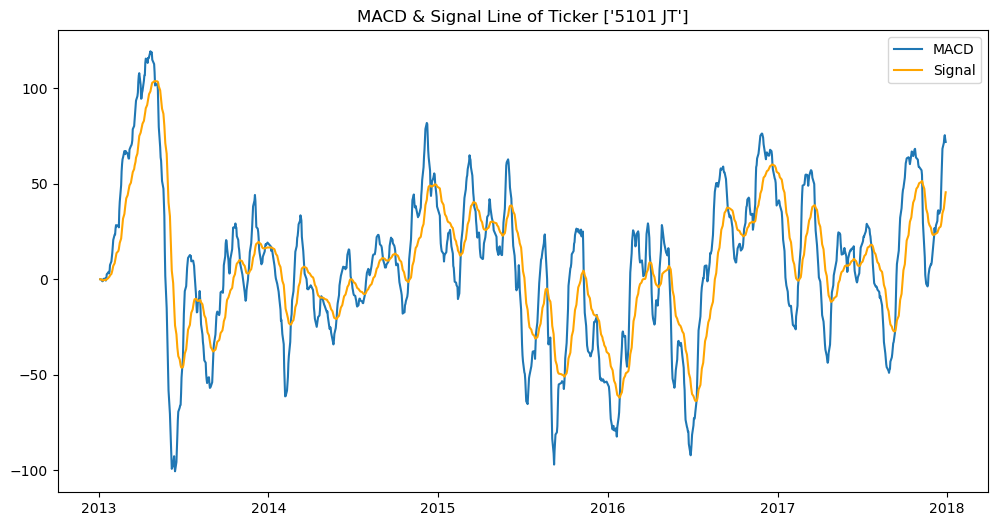

In [385]:
## plot the pattern
tick = data.ticker.unique().tolist()
# pick one tick
rd_tick = sample(tick, 1)

# plot the MACD & Signal
macd_line = macd[rd_tick]
signal_line = signal[rd_tick]
date_line = macd.index

plt.figure(figsize = (12,6))
plt.plot(date_line,macd_line, label = "MACD")
plt.plot(date_line,signal_line, color = "orange", label = "Signal")
plt.title("MACD & Signal Line of Ticker %s"%rd_tick)
plt.legend()
plt.show()

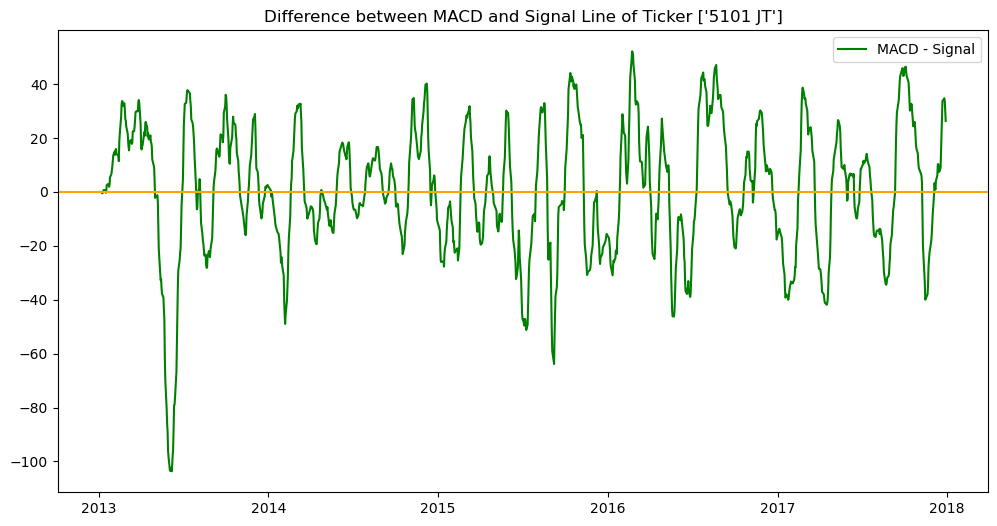

In [386]:
plt.figure(figsize = (12,6))
plt.plot(date_line,macd_line - signal_line,color = "green", label = "MACD - Signal")
plt.axhline(0, color = "orange")
plt.title("Difference between MACD and Signal Line of Ticker %s"%rd_tick)
plt.legend()
plt.show()

We can verify from the plot whether the momentum pattern exists in this framework. The random pick of tickers allows you to see whether this pattern is appliable to different tickers.

The Difference between MACD and Signal line shows that there is an obvious momentum pattern in the stocks. 

In [387]:
## create signals for each stock 
buy_sell_signal = (((macd - signal) > 0) * 1).diff().fillna(0).astype(int)
buy_sell_signal = buy_sell_signal.stack().reset_index().rename(columns = {0:"signal"})

buy_sell_signal["signal"] = np.where(buy_sell_signal["signal"] != 0, buy_sell_signal["signal"], np.nan)
data_train = pd.merge(data_train, buy_sell_signal, on = ["ticker","date"], how = "left")

data_train

,ticker,date,last,volume,daily_ret,signal
0,1332 JT,2013-01-04,169.0987,1464100,NaN,NaN
1,1332 JT,2013-01-07,166.3266,1783500,-0.016529,NaN
2,1332 JT,2013-01-08,166.3266,1759800,0.000000,NaN
3,1332 JT,2013-01-09,165.4026,767800,-0.005571,NaN
4,1332 JT,2013-01-10,167.2507,1503100,0.011111,1.0
...,...,...,...,...,...,...
275608,9984 JT,2017-12-25,4385.4768,5102800,-0.000447,NaN
275609,9984 JT,2017-12-26,4374.2144,4564000,-0.002571,NaN
275610,9984 JT,2017-12-27,4368.8281,5479200,-0.001232,NaN
275611,9984 JT,2017-12-28,4372.7454,6304600,0.000896,NaN


In [388]:
## use the signal to trade , hold for a fixed mark time
## Suppose trade for a certain percent of average daily volume each transaction
mark_time = 5
data_train["future_mark_time_ret"] = data_train.groupby('ticker')['daily_ret'].transform(lambda x : x.rolling(mark_time).sum().shift(-mark_time))
data_train["adv"] = data_train.assign(dollar_volume = data_train['volume'] * data_train['last']).groupby('ticker')['dollar_volume'].transform(lambda x: x.rolling(20, min_periods = 1).mean()) 

data_train["trading_return"] = data_train["signal"] * data_train["future_mark_time_ret"]
data_train.head(10)

,ticker,date,last,volume,daily_ret,signal,future_mark_time_ret,adv,trading_return
0,1332 JT,2013-01-04,169.0987,1464100,NaN,NaN,0.010870,2.475774e+08,NaN
1,1332 JT,2013-01-07,166.3266,1783500,-0.016529,NaN,0.048791,2.721104e+08,NaN
2,1332 JT,2013-01-08,166.3266,1759800,0.000000,NaN,0.016529,2.789741e+08,NaN
3,1332 JT,2013-01-09,165.4026,767800,-0.005571,NaN,0.022100,2.409796e+08,NaN
4,1332 JT,2013-01-10,167.2507,1503100,0.011111,1.0,0.043250,2.430626e+08,0.04325
5,1332 JT,2013-01-11,170.9468,2864200,0.021859,NaN,0.016086,2.841565e+08,NaN
6,1332 JT,2013-01-15,174.6430,2407400,0.021391,NaN,-0.021391,3.036249e+08,NaN
7,1332 JT,2013-01-16,169.0987,3636700,-0.032261,NaN,-0.027703,3.425420e+08,NaN
8,1332 JT,2013-01-17,169.0987,3433500,0.000000,NaN,-0.016529,3.689929e+08,NaN
9,1332 JT,2013-01-18,174.6430,1847500,0.032261,NaN,-0.021391,3.643589e+08,NaN


Text(0.5, 1.0, 'The Cumulative Returns of the MACD Strategies - fixed mark time everyday')

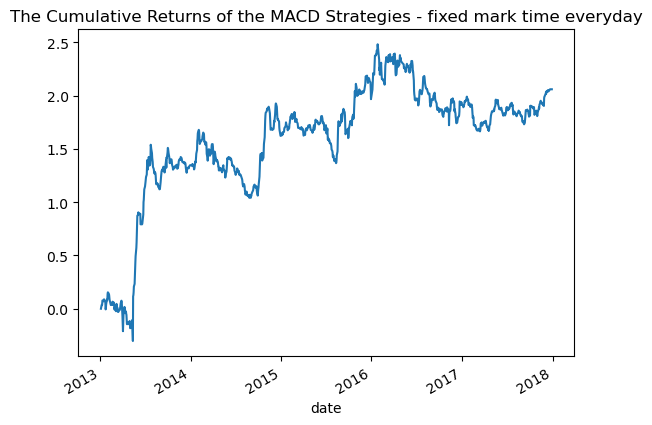

In [389]:
def weighted_ret(x):
    x = x.dropna()
    if len(x) == 0:
        return 0 
    return (x["trading_return"] * x["adv"]).sum() / x["adv"].sum()

## analyze the daily return of the strategies
trading_daily_ret = data_train.groupby("date")[["trading_return","adv"]].apply(weighted_ret)

## plot.the cumulatative returns
trading_daily_ret.dropna().cumsum().plot()
plt.title("The Cumulative Returns of the MACD Strategies - fixed mark time everyday")

In [390]:
## t-statistics
td_rets = trading_daily_ret.dropna()
t_stat = td_rets.mean() / (td_rets.std()/np.sqrt(len(td_rets)))
t_stat

1.802155559686543

T-statistics shows slightly significant positive daily returns of this strategy.

### 2.2  Use 1 stock price to predict another stock price

In [391]:
from sklearn.linear_model import LinearRegression 
from scipy.stats import linregress
import time

In [392]:
data_train = data_train_cp.copy()

In [250]:
## calculate the lag-1 regression coefficient between each pair of tickers
tick = data.ticker.unique()
pairs = []

for i in range(len(tick)):
    start = time.time()
    for j in range(len(tick)):  
        Y = data_train[data_train["ticker"] ==tick[i]][["daily_ret"]].shift(-1).reset_index(drop = True)
        X = data_train[data_train["ticker"] ==tick[j]][["daily_ret"]].reset_index(drop = True)
        df = pd.concat([X,Y], axis = 1).dropna()
        X = np.array(df.iloc[:,0]).flatten()
        Y = np.array(df.iloc[:,1]).flatten()
        
        if len(X)== 0:
            continue
        slope, intercept, r, p, se = linregress(X,Y)
        pairs.append({"Y":tick[i],"X":tick[j],"Beta":slope, "p-value":p})
    
    print(i," elapsed time:", time.time() - start)

0  elapsed time: 5.8080527782440186
1  elapsed time: 7.409595251083374
2  elapsed time: 8.58219289779663
3  elapsed time: 8.062103748321533
4  elapsed time: 7.972596883773804
5  elapsed time: 8.008507251739502
6  elapsed time: 7.972109317779541
7  elapsed time: 8.140156984329224
8  elapsed time: 8.080326318740845
9  elapsed time: 7.996117115020752
10  elapsed time: 7.9670305252075195
11  elapsed time: 8.045177221298218
12  elapsed time: 9.26067066192627
13  elapsed time: 8.106546640396118
14  elapsed time: 8.012319803237915
15  elapsed time: 7.998041152954102
16  elapsed time: 7.933276176452637
17  elapsed time: 8.079990863800049
18  elapsed time: 8.085680484771729
19  elapsed time: 7.872779846191406
20  elapsed time: 9.409282445907593
21  elapsed time: 7.979032039642334
22  elapsed time: 7.998735666275024
23  elapsed time: 8.007867097854614
24  elapsed time: 8.00105905532837
25  elapsed time: 7.996225118637085
26  elapsed time: 7.950043678283691
27  elapsed time: 7.9967968463897705
28

225  elapsed time: 7.986412048339844
226  elapsed time: 7.974812269210815
227  elapsed time: 8.674099445343018
228  elapsed time: 8.160016298294067
229  elapsed time: 7.976273059844971
230  elapsed time: 7.977719068527222
231  elapsed time: 7.990966320037842
232  elapsed time: 8.035691738128662
233  elapsed time: 7.9735634326934814
234  elapsed time: 7.9138100147247314
235  elapsed time: 8.139831066131592
236  elapsed time: 7.939847469329834
237  elapsed time: 7.990629434585571
238  elapsed time: 8.023305177688599
239  elapsed time: 8.065487146377563
240  elapsed time: 7.970712184906006
241  elapsed time: 7.971613883972168
242  elapsed time: 8.004221677780151
243  elapsed time: 8.27224087715149
244  elapsed time: 8.328830480575562
245  elapsed time: 8.170199155807495
246  elapsed time: 8.667579889297485
247  elapsed time: 8.465448379516602


In [251]:
pairs_relation = pd.DataFrame(pairs)
pairs_relation.to_csv("pais_relation.csv")

In [393]:
## filter for small p-value 
sig_pairs = pairs_relation[(pairs_relation["p-value"] <= 0.01)]
sig_pairs = sig_pairs.sort_values(by = "p-value", ascending = True)
sig_pairs = sig_pairs.drop_duplicates(subset = ["Y"])
sig_pairs

,Y,X,Beta,p-value
1058,1721 JT,5901 JT,-0.131659,1.230626e-08
16556,4704 JT,4543 JT,-0.167630,2.958929e-08
6960,3103 JT,3103 JT,-0.155500,4.573368e-08
40254,7951 JT,5901 JT,-0.155640,1.036393e-07
55832,9613 JT,7004 JT,-0.126107,2.655472e-07
...,...,...,...,...
1754,1803 JT,5232 JT,0.080093,7.531832e-03
38100,7272 JT,5801 JT,0.100017,8.209907e-03
2189,1812 JT,3436 JT,-0.045786,8.969312e-03
55235,9532 JT,3086 JT,-0.048437,9.672309e-03


In [394]:
data_train["adv"] = data_train.assign(dollar_volume = data_train['volume'] * data_train['last']).groupby('ticker')['dollar_volume'].transform(lambda x: x.rolling(20, min_periods = 1).mean()) 
reg_data = pd.merge(data_train,sig_pairs, left_on = "ticker", right_on = "Y", how = "left").drop(["Y","p-value"], axis = 1)
reg_data

,ticker,date,last,volume,daily_ret,adv,X,Beta
0,1332 JT,2013-01-04,169.0987,1464100,NaN,2.475774e+08,3103 JT,-0.126737
1,1332 JT,2013-01-07,166.3266,1783500,-0.016529,2.721104e+08,3103 JT,-0.126737
2,1332 JT,2013-01-08,166.3266,1759800,0.000000,2.789741e+08,3103 JT,-0.126737
3,1332 JT,2013-01-09,165.4026,767800,-0.005571,2.409796e+08,3103 JT,-0.126737
4,1332 JT,2013-01-10,167.2507,1503100,0.011111,2.430626e+08,3103 JT,-0.126737
...,...,...,...,...,...,...,...,...
275608,9984 JT,2017-12-25,4385.4768,5102800,-0.000447,4.607881e+10,8316 JT,0.106656
275609,9984 JT,2017-12-26,4374.2144,4564000,-0.002571,4.499490e+10,8316 JT,0.106656
275610,9984 JT,2017-12-27,4368.8281,5479200,-0.001232,4.434386e+10,8316 JT,0.106656
275611,9984 JT,2017-12-28,4372.7454,6304600,0.000896,4.177361e+10,8316 JT,0.106656


In [395]:
X_price = data_train[["ticker","date","daily_ret"]].rename(columns = {"ticker":"X","daily_ret":"daily_ret_x"})
X_price["daily_ret_x"] = X_price["daily_ret_x"].shift(1)
reg_data = pd.merge(reg_data, X_price, left_on=["X","date"], right_on=["X","date"], how = "left")
reg_data

,ticker,date,last,volume,daily_ret,adv,X,Beta,daily_ret_x
0,1332 JT,2013-01-04,169.0987,1464100,NaN,2.475774e+08,3103 JT,-0.126737,-0.000977
1,1332 JT,2013-01-07,166.3266,1783500,-0.016529,2.721104e+08,3103 JT,-0.126737,NaN
2,1332 JT,2013-01-08,166.3266,1759800,0.000000,2.789741e+08,3103 JT,-0.126737,0.020619
3,1332 JT,2013-01-09,165.4026,767800,-0.005571,2.409796e+08,3103 JT,-0.126737,0.040005
4,1332 JT,2013-01-10,167.2507,1503100,0.011111,2.430626e+08,3103 JT,-0.126737,0.000000
...,...,...,...,...,...,...,...,...,...
275608,9984 JT,2017-12-25,4385.4768,5102800,-0.000447,4.607881e+10,8316 JT,0.106656,0.013151
275609,9984 JT,2017-12-26,4374.2144,4564000,-0.002571,4.499490e+10,8316 JT,0.106656,-0.011727
275610,9984 JT,2017-12-27,4368.8281,5479200,-0.001232,4.434386e+10,8316 JT,0.106656,-0.006734
275611,9984 JT,2017-12-28,4372.7454,6304600,0.000896,4.177361e+10,8316 JT,0.106656,0.000000


In [396]:
reg_data["indicator"] = reg_data["Beta"] * reg_data["daily_ret_x"] * np.sqrt(reg_data["adv"]) * 1/1000 
reg_data

,ticker,date,last,volume,daily_ret,adv,X,Beta,daily_ret_x,indicator
0,1332 JT,2013-01-04,169.0987,1464100,NaN,2.475774e+08,3103 JT,-0.126737,-0.000977,0.001947
1,1332 JT,2013-01-07,166.3266,1783500,-0.016529,2.721104e+08,3103 JT,-0.126737,NaN,NaN
2,1332 JT,2013-01-08,166.3266,1759800,0.000000,2.789741e+08,3103 JT,-0.126737,0.020619,-0.043647
3,1332 JT,2013-01-09,165.4026,767800,-0.005571,2.409796e+08,3103 JT,-0.126737,0.040005,-0.078706
4,1332 JT,2013-01-10,167.2507,1503100,0.011111,2.430626e+08,3103 JT,-0.126737,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...
275608,9984 JT,2017-12-25,4385.4768,5102800,-0.000447,4.607881e+10,8316 JT,0.106656,0.013151,0.301098
275609,9984 JT,2017-12-26,4374.2144,4564000,-0.002571,4.499490e+10,8316 JT,0.106656,-0.011727,-0.265305
275610,9984 JT,2017-12-27,4368.8281,5479200,-0.001232,4.434386e+10,8316 JT,0.106656,-0.006734,-0.151243
275611,9984 JT,2017-12-28,4372.7454,6304600,0.000896,4.177361e+10,8316 JT,0.106656,0.000000,0.000000


In [397]:
reg_data.nlargest(10, 'indicator')

,ticker,date,last,volume,daily_ret,adv,X,Beta,daily_ret_x,indicator
260999,9501 JT,2013-05-14,522.0000,352213400,0.166358,9.877626e+10,6326 JT,0.110264,0.152955,5.300579
222171,8604 JT,2013-05-13,738.6701,258457300,0.091890,8.755977e+10,5714 JT,0.117021,0.138726,4.803681
236327,8815 JT,2013-05-24,1005.5411,15149000,0.027124,1.280180e+10,5715 JT,-0.260094,-0.135254,3.980300
261019,9501 JT,2013-06-11,534.0000,169504300,-0.056430,2.293391e+11,6326 JT,0.110264,0.074801,3.949868
173862,7203 JT,2015-10-30,6349.7010,10627800,0.001608,6.515971e+10,2432 JT,-0.091079,-0.161677,3.758882
210355,8306 JT,2013-05-13,565.2341,270024700,0.078556,6.119056e+10,5714 JT,0.106217,0.138726,3.644988
211151,8306 JT,2016-08-09,451.9179,77937200,0.008619,4.257316e+10,5714 JT,0.106217,0.148671,3.258293
148739,6758 JT,2013-05-13,1769.1184,33153800,0.037346,4.244064e+10,7731 JT,0.114311,0.136049,3.203867
152787,6770 JT,2015-10-30,3508.4327,8982900,0.058401,1.404785e+10,2432 JT,-0.156691,-0.161677,3.002600
273272,9983 JT,2013-06-14,26979.7528,2795100,0.013568,4.241512e+10,5901 JT,-0.150399,-0.092487,2.864748


Text(0.5, 1.0, 'The Cumulative Returns of the Regression methods')

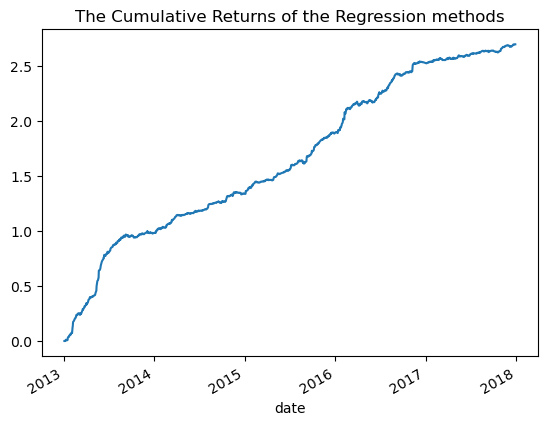

In [398]:
## hold for only 1 day with dollar amount proportional to indicator
def weighted_ret2(x):
    x = x.dropna()
    if len(x) == 0:
        return 0 
    return (x["daily_ret"] * x["indicator"]).sum() / np.abs(x["indicator"]).sum()

## analyze the daily return of the strategies
trading_daily_ret = reg_data.groupby("date")[["daily_ret","indicator"]].apply(weighted_ret2)

## plot.the cumulatative returns
trading_daily_ret.dropna().cumsum().plot()
plt.title("The Cumulative Returns of the Regression methods")

In [399]:
## t-statistics
td_rets = trading_daily_ret.dropna()
t_stat = td_rets.mean() / (td_rets.std()/np.sqrt(len(td_rets)))
t_stat

12.375787034008493

##### The regression coeff is calculted using the whole training dataset. Shold notice this t-stats may be a result of overfit and data leak.

# 3. Out-of-sample Test & Comparison

### 3.1 MACD

In [400]:
short = 12
long = 26
signal_period = 30 ### the parameters are from the train datasets!!

data["daily_ret"] = data.groupby("ticker")["last"].transform(lambda x: np.log(x).diff())
data["short_ema"] = data.groupby("ticker")["last"].transform(lambda x: x.ewm(span = short).mean())
data["long_ema"] = data.groupby("ticker")["last"].transform(lambda x: x.ewm(span = long).mean())
data["macd"] =  data["short_ema"] - data["long_ema"]
data["macd_ema"] = data.groupby("ticker")["macd"].transform(lambda x: x.ewm(span = signal_period).mean())
data["adv"] = data.assign(dollar_volume = data['volume'] * data['last']).groupby('ticker')['dollar_volume'].transform(lambda x: x.rolling(20, min_periods = 1).mean()) 

data_test = data[(data["date"] >= test_start) & (data["date"] <= test_end)]
data_test_cp = data_test.copy()

In [401]:
## create signal 
data_test["signal"] = ((data_test["macd"] > data_test["macd_ema"]) * 1).diff().fillna(0).astype(int)
data_test["signal"] = np.where(data_test["signal"]!=0, data_test["signal"], np.nan)

## Suppose trade for a certain percent of average daily volume each transaction
mark_time = 5
data_test["future_mark_time_ret"] = data_test.groupby('ticker')['daily_ret'].transform(lambda x : x.rolling(mark_time).sum().shift(-mark_time))

data_test["trading_return"] = data_test["signal"] * data_test["future_mark_time_ret"]

Text(0.5, 1.0, 'The Cumulative Returns of the MACD Strategies -TEST DATA')

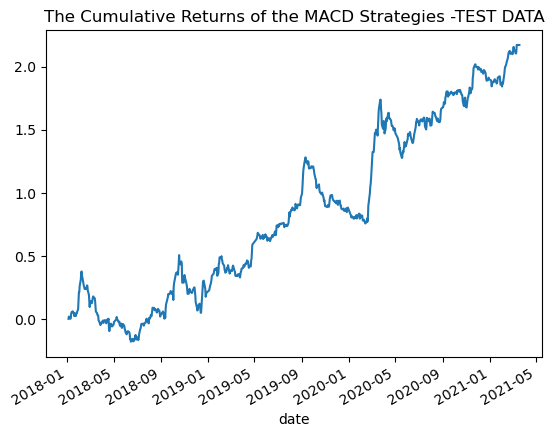

In [402]:
def weighted_ret(x):
    x = x.dropna()
    if len(x) == 0:
        return 0 
    return (x["trading_return"] * x["adv"]).sum() / x["adv"].sum()

## analyze the daily return of the strategies
trading_daily_ret = data_test.groupby("date")[["trading_return","adv"]].apply(weighted_ret)

## plot.the cumulatative returns
trading_daily_ret.dropna().cumsum().plot()
plt.title("The Cumulative Returns of the MACD Strategies -TEST DATA")

In [403]:
## t-statistics
td_rets = trading_daily_ret.dropna()
t_stat = td_rets.mean() / (td_rets.std()/np.sqrt(len(td_rets)))
t_stat

2.8389856282985204

###  3.2 Regression

In [404]:
### BackTest on testing dataset using the beta gained in training set
reg_data = pd.merge(data_test_cp, sig_pairs, left_on = "ticker", right_on = "Y", how = "left").drop(["Y","p-value"], axis = 1)
X_price = data[["ticker","date","daily_ret"]].rename(columns = {"ticker":"X","daily_ret":"daily_ret_x"})
X_price["daily_ret_x"] = X_price["daily_ret_x"].shift(1)
reg_data = pd.merge(reg_data, X_price, left_on=["X","date"], right_on=["X","date"], how = "left")

In [405]:
reg_data["indicator"] = reg_data["Beta"] * reg_data["daily_ret_x"] * np.sqrt(reg_data["adv"]) * 1/1000 
reg_data

,ticker,date,last,volume,daily_ret,short_ema,long_ema,macd,macd_ema,adv,X,Beta,daily_ret_x,indicator
0,1332 JT,2018-01-04,565.7521,5027900,0.001696,577.574213,580.776170,-3.201957,-4.272861,2.064143e+09,3103 JT,-0.126737,0.006057,-0.034876
1,1332 JT,2018-01-05,565.7521,3386100,0.000000,575.755426,579.663276,-3.907849,-4.249312,2.039910e+09,3103 JT,-0.126737,0.023867,-0.136620
2,1332 JT,2018-01-09,571.5056,4979600,0.010118,575.101607,579.059003,-3.957397,-4.230479,2.023016e+09,3103 JT,-0.126737,-0.010670,0.060822
3,1332 JT,2018-01-10,581.0946,5220200,0.016639,576.023606,579.209788,-3.186183,-4.163105,2.087204e+09,3103 JT,-0.126737,-0.007177,0.041556
4,1332 JT,2018-01-11,579.1768,4325000,-0.003306,576.508713,579.207345,-2.698632,-4.068623,2.080014e+09,3103 JT,-0.126737,0.010746,-0.062115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175495,9984 JT,2021-03-15,10370.0000,12041200,-0.025233,10235.035797,9944.374220,290.661577,358.166429,1.302989e+11,8316 JT,0.106656,0.002757,0.106126
175496,9984 JT,2021-03-16,10620.0000,11346000,0.023822,10294.261059,9994.420574,299.840485,354.403465,1.301165e+11,8316 JT,0.106656,0.034919,1.343410
175497,9984 JT,2021-03-17,10400.0000,9771000,-0.020933,10310.528588,10024.463495,286.065094,349.994538,1.277388e+11,8316 JT,0.106656,-0.013136,-0.500724
175498,9984 JT,2021-03-18,10220.0000,13941600,-0.017459,10296.601113,10038.947680,257.653433,344.037047,1.294160e+11,8316 JT,0.106656,0.001957,0.075086


Text(0.5, 1.0, 'The Cumulative Returns of the Regression methods - TEST DATA')

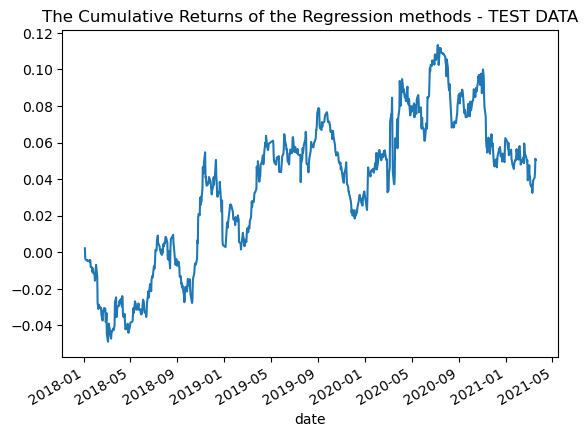

In [406]:
## hold for only 1 day with dollar amount proportional to indicator
def weighted_ret2(x):
    x = x.dropna()
    if len(x) == 0:
        return 0 
    return (x["daily_ret"] * x["indicator"]).sum() / np.abs(x["indicator"]).sum()

## analyze the daily return of the strategies
trading_daily_ret = reg_data.groupby("date")[["daily_ret","indicator"]].apply(weighted_ret2)

## plot.the cumulatative returns
trading_daily_ret.dropna().cumsum().plot()
plt.title("The Cumulative Returns of the Regression methods - TEST DATA")

In [407]:
## t-statistics
td_rets = trading_daily_ret.dropna()
t_stat = td_rets.mean() / (td_rets.std()/np.sqrt(len(td_rets)))
t_stat

0.3932456494164009

### Summary:

1. MACD does not rely on parameter estimation, only some hyper-params of moving average periods. It profits on the momentum.

2. Beta Regression overfits in training dataset and depends heavily in paramter estimation. It may oversimplify the problem by assuming that some stocks might predict the pirce of other stocks continuously.   